In [3]:
#Importing the dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
import pickle

In [4]:
#Data Loading and Understanding
# Import pandas
import pandas as pd

# Data Loading and Understanding
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv', encoding='utf-8-sig')

In [5]:
#knowing the no of rows & columns
df.shape

(7043, 21)

In [6]:
#showing first 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
#displaying all the truncated columns
pd.set_option("display.max_columns" , None)
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [8]:
#showing the description of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


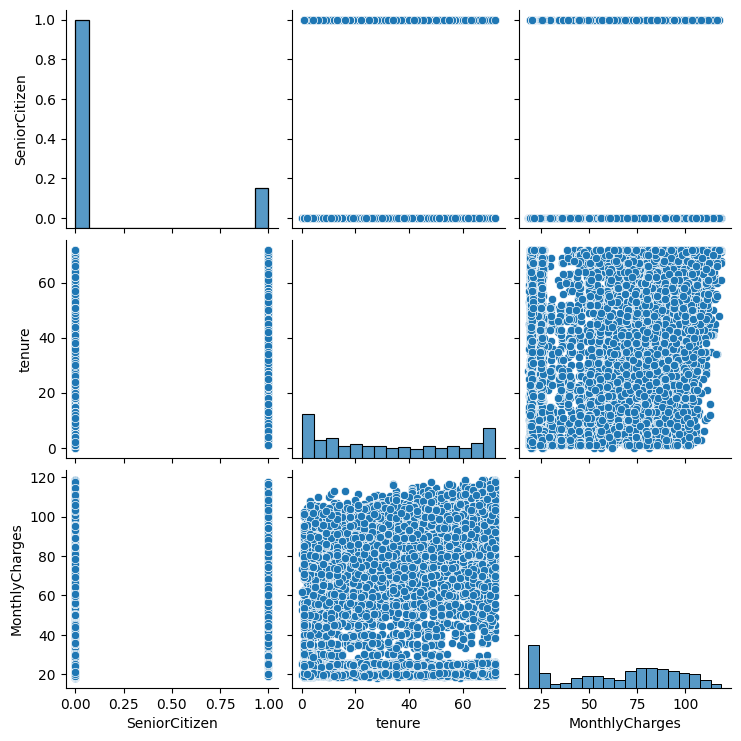

In [9]:
sns.pairplot(df)

In [10]:
#dropping the column as it is not required
df = df.drop(columns=["customerID"])
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [11]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
#printing unique values in columns
numerical_features_list = ["tenure" , "MonthlyCharges" , "TotalCharges"]
for col in df.columns:
    if col not in numerical_features_list:
        print(col,df[col].unique())
        print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

In [13]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
df[df["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [15]:
len(df[df["TotalCharges"]==" "])

11

In [16]:
df["TotalCharges"] = df["TotalCharges"].replace({" ": "0.0"})

In [17]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [19]:
#checking distribution of target column
print(df["Churn"].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [20]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [21]:
#understanding the numerical features
def plot_histogram(df , column_name):
    plt.figure(figsize=(5,3))
    sns.histplot(df[column_name], kde=True)
    
    #calculating mean and median values
    col_mean = df[column_name].mean()
    col_median = df[column_name].median()
    
    #add vertical lines for mean and median
    plt.axvline(col_mean , color="red" , linestyle="--" , label="Mean")
    plt.axvline(col_median , color="green" , linestyle="-" , label="Median")
    
    plt.legend()
    plt.show()

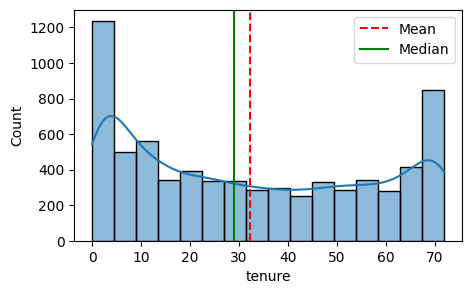

In [22]:
plot_histogram(df , "tenure")

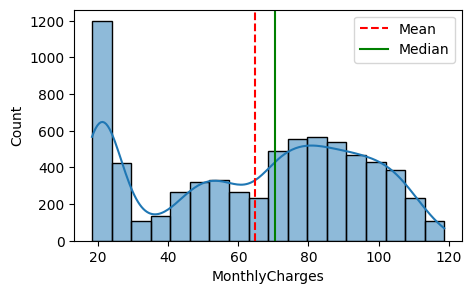

In [23]:
plot_histogram(df , "MonthlyCharges")

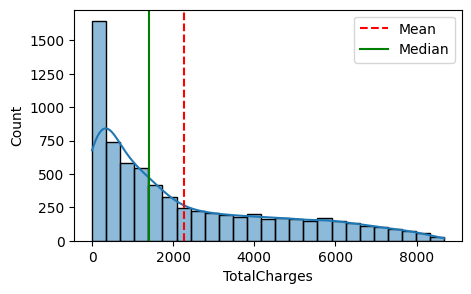

In [24]:
plot_histogram(df , "TotalCharges")

In [25]:
#Box plot for numerical features
def plot_boxplot(df , column_name):
    
    plt.figure(figsize=(5,3))
    sns.boxplot(y=df[column_name])
    plt.ylabel(column_name)
    plt.show

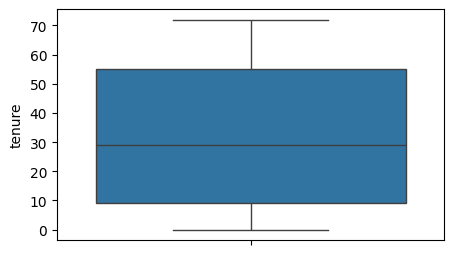

In [26]:
plot_boxplot(df , "tenure")

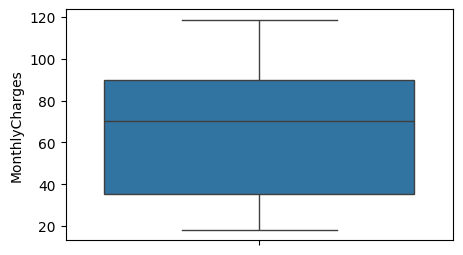

In [27]:
plot_boxplot(df , "MonthlyCharges")

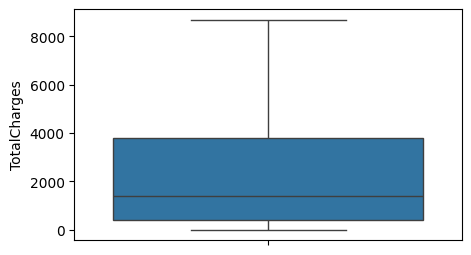

In [28]:
plot_boxplot(df , "TotalCharges")

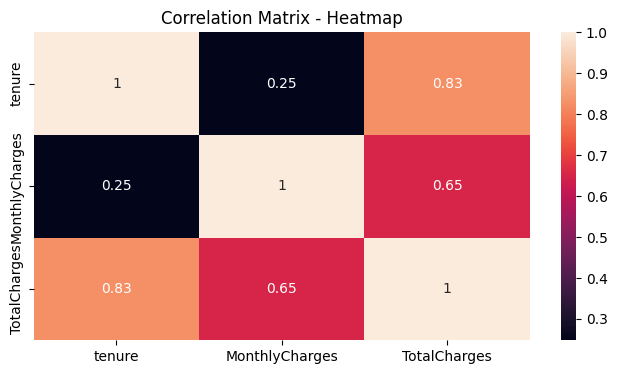

In [29]:
#correlation matrix - heatmap
plt.figure(figsize=(8,4))
sns.heatmap(df[["tenure" , "MonthlyCharges" , "TotalCharges"]].corr() , annot=True)
plt.title("Correlation Matrix - Heatmap")
plt.show()

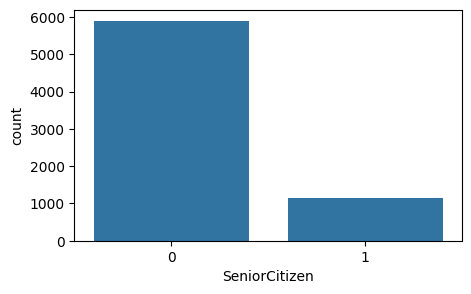

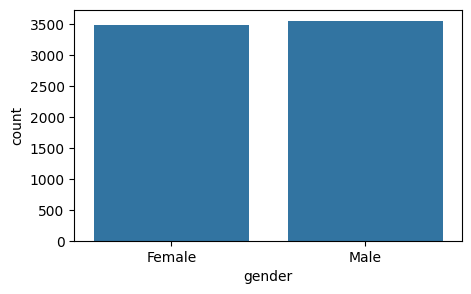

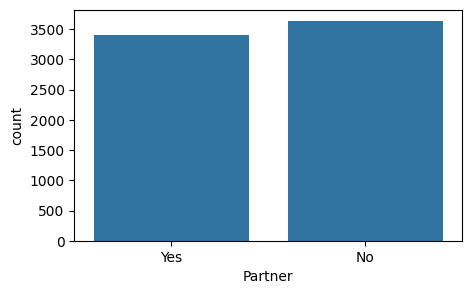

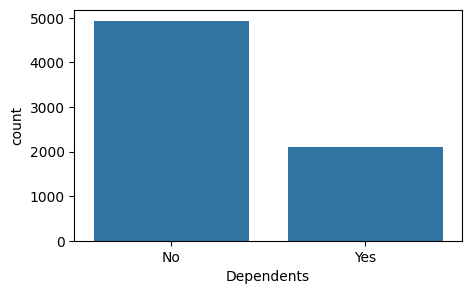

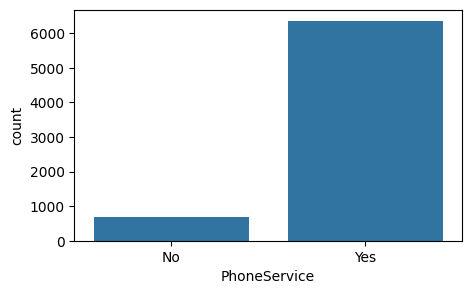

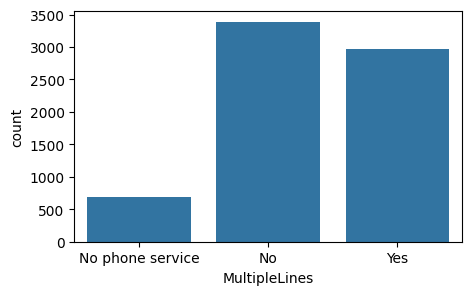

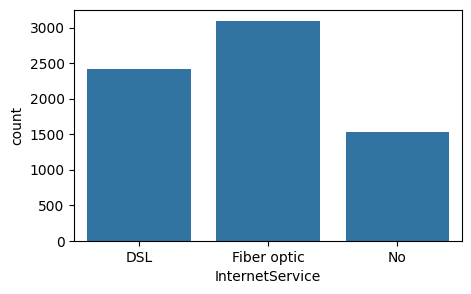

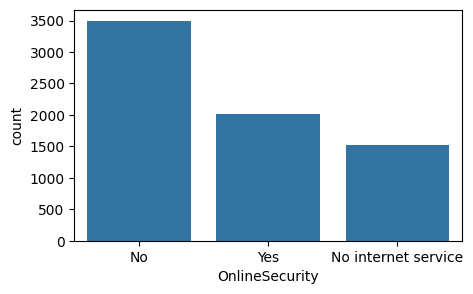

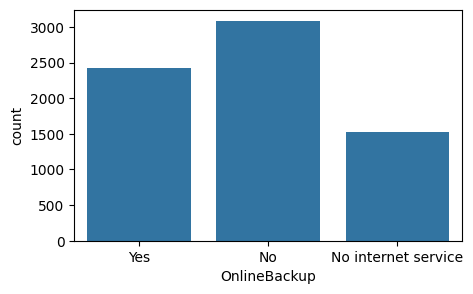

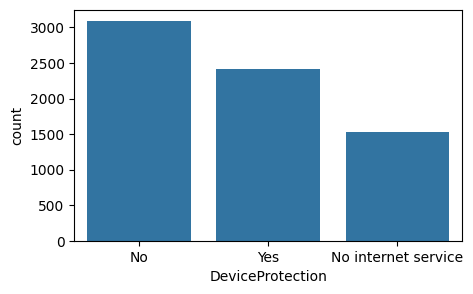

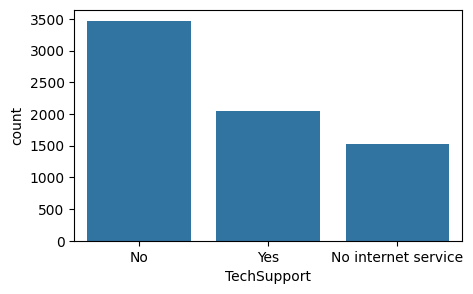

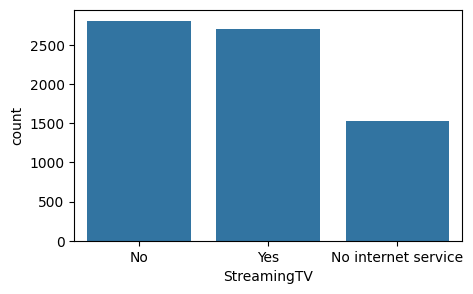

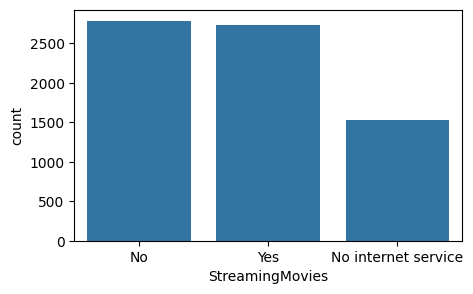

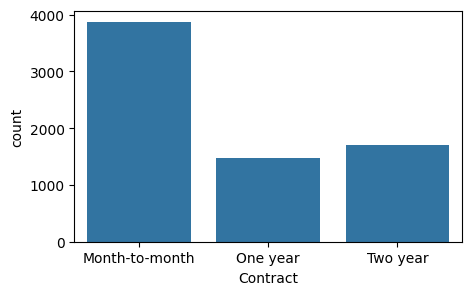

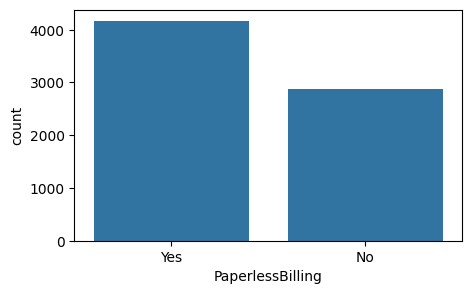

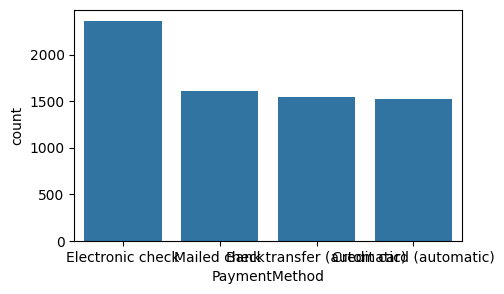

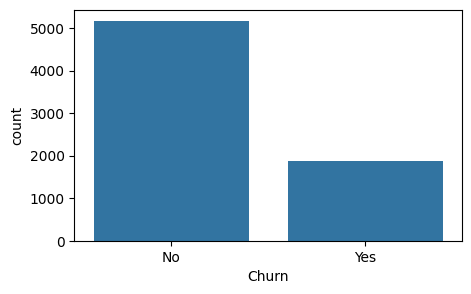

In [30]:
#categorical features analysis
#countplot for categorical columns
object_cols = df.select_dtypes(include="object").columns.to_list()
object_cols = ["SeniorCitizen"] + object_cols

for col in object_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(x=df[col])
    plt.show()

In [31]:
#data preprocessing
#label encoding of target column
#replace yes with 1 and no with 0 in churn column

df["Churn"] = df["Churn"].replace({"Yes": 1 , "No": 0})
df.head(3)

C:\Users\shubh\AppData\Local\Temp\ipykernel_2372\2333092839.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"] = df["Churn"].replace({"Yes": 1 , "No": 0})


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [32]:
object_columns = df.select_dtypes(include="object").columns
print(object_columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [33]:
from sklearn.preprocessing import LabelEncoder
import pickle

# Ensure object_columns is defined (if not already defined earlier)
object_columns = df.select_dtypes(include=['object']).columns

# Initialize a dictionary to store label encoders
encoders = {}

# Apply LabelEncoder to each categorical column
for column in object_columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    encoders[column] = label_encoder

# Save the encoders to model/encoders.pkl (outside the loop)
with open("model/encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)

In [34]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [35]:
#coverted the categorical values into numerical values
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [36]:
#splitting the features and target
x = df.drop(columns=["Churn"])
y = df["Churn"]

In [37]:
print(x)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0     

In [38]:
print(y)

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64


In [39]:
#splitting the train and test set
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2,random_state=42)

In [40]:
#smote - synthetic minority oversampling technique (only on training data)
smote = SMOTE(random_state=42)

In [41]:
x_train_smote , y_train_smote = smote.fit_resample(x_train , y_train)

In [42]:
#Model Training
models = {
    "Decision Tree" : DecisionTreeClassifier(random_state=42),
    "Random Forest-InformationGain" : RandomForestClassifier(random_state=42),
    "Random Forest-Entropy" : RandomForestClassifier(criterion='entropy'),
    "XGBoost" : XGBRFClassifier(random_state=42),
    "LogisticRegression" : LogisticRegression(max_iter=1000,solver='liblinear'),
    "SVM" : SVC(cache_size=100),
    "KNeighbors" : KNeighborsClassifier(n_neighbors=3),
    "Bernoulli Naive Bayes" : BernoulliNB(),
    "Gaussian Naive Bayes" : GaussianNB()
}

In [43]:
#perform 5 fold cross validation on each model
cv_scores = {}
for model_name , model in models.items():
    f=(model_name)
    print(f)
    scores = cross_val_score(model , x_train_smote , y_train_smote , cv=5 , scoring="accuracy")
    cv_scores[model_name] = scores
    print(f"{model_name} cross validation accuracy : {np.mean(scores):.2f}")
    print("."*50)
    


Decision Tree
Decision Tree cross validation accuracy : 0.78
..................................................
Random Forest-InformationGain
Random Forest-InformationGain cross validation accuracy : 0.84
..................................................
Random Forest-Entropy
Random Forest-Entropy cross validation accuracy : 0.84
..................................................
XGBoost
XGBoost cross validation accuracy : 0.81
..................................................
LogisticRegression
LogisticRegression cross validation accuracy : 0.79
..................................................
SVM
SVM cross validation accuracy : 0.64
..................................................
KNeighbors
KNeighbors cross validation accuracy : 0.78
..................................................
Bernoulli Naive Bayes
Bernoulli Naive Bayes cross validation accuracy : 0.76
..................................................
Gaussian Naive Bayes
Gaussian Naive Bayes cross validation accuracy 

C:\Users\shubh\AppData\Local\Temp\ipykernel_2372\3327385337.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=model_names, y=accuracy_scores, palette="pastel")


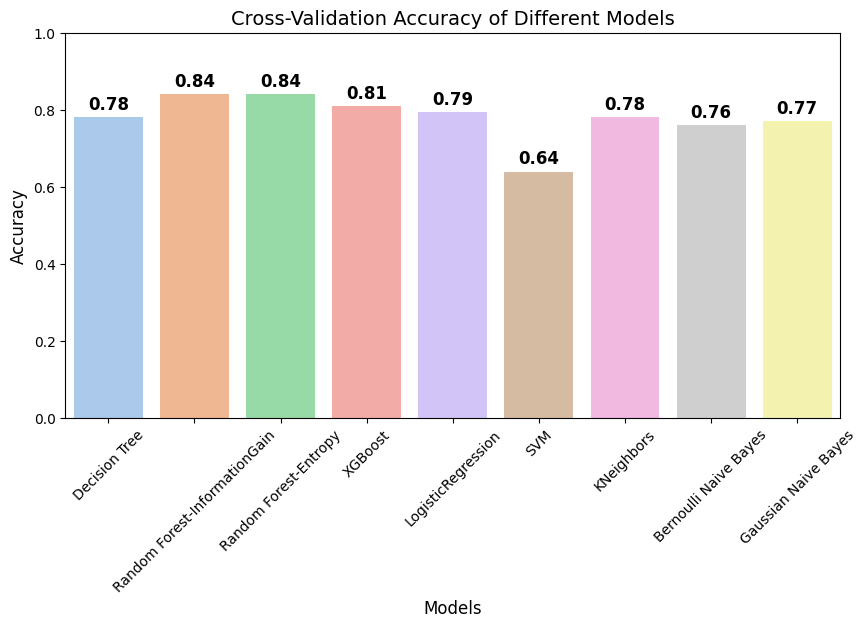

In [44]:
# Calculate mean accuracy for each model
mean_scores = {model: np.mean(scores) for model, scores in cv_scores.items()}

# Convert to lists for plotting
model_names = list(mean_scores.keys())
accuracy_scores = list(mean_scores.values())

# Create bar plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=model_names, y=accuracy_scores, palette="pastel")

# Add accuracy labels on top of each bar
for i, score in enumerate(accuracy_scores):
    ax.text(i, score + 0.02, f"{score:.2f}", ha="center", fontsize=12, fontweight="bold")

# Add titles and labels
plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("Cross-Validation Accuracy of Different Models", fontsize=14)
plt.ylim(0, 1)  # Accuracy is between 0 and 1

# Rotate model names for readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [45]:
#each fold accuracy - we take mean
cv_scores

{'Decision Tree': array([0.69202899, 0.70574018, 0.82537764, 0.83806647, 0.84350453]),
 'Random Forest-InformationGain': array([0.73067633, 0.77039275, 0.90392749, 0.89969789, 0.90030211]),
 'Random Forest-Entropy': array([0.73067633, 0.76555891, 0.9081571 , 0.8978852 , 0.89969789]),
 'XGBoost': array([0.72705314, 0.77160121, 0.85377644, 0.84169184, 0.85438066]),
 'LogisticRegression': array([0.73731884, 0.74743202, 0.8265861 , 0.81873112, 0.83564955]),
 'SVM': array([0.65519324, 0.65740181, 0.61510574, 0.61993958, 0.65015106]),
 'KNeighbors': array([0.76449275, 0.76555891, 0.78429003, 0.79879154, 0.78851964]),
 'Bernoulli Naive Bayes': array([0.72101449, 0.73111782, 0.78610272, 0.77703927, 0.78791541]),
 'Gaussian Naive Bayes': array([0.7071256 , 0.7347432 , 0.80966767, 0.79214502, 0.80664653])}

In [46]:
rfc = RandomForestClassifier(random_state=42)

In [47]:
rfc.fit(x_train_smote , y_train_smote)

RandomForestClassifier(random_state=42)

In [48]:
#model evaluation
#evaluate on test data
y_test_pred = rfc.predict(x_test)

print("Accuracy Score : \n" , accuracy_score(y_test , y_test_pred))
print("Confusion Matrix : \n" , confusion_matrix(y_test , y_test_pred))
print("Classification Report : \n" , classification_report(y_test , y_test_pred))

Accuracy Score : 
 0.7785663591199432
Confusion Matrix : 
 [[878 158]
 [154 219]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.59      0.58       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



In [49]:
#save the model as pickle file
import os

# Create the model/ directory if it doesn't exist
if not os.path.exists('model'):
    os.makedirs('model')

model_data = {"model": rfc, "features_name": x.columns.tolist()}
with open("model/customer_churn_prediction_model.pkl", "wb") as f:
    pickle.dump(model_data, f)

In [51]:
#Load the saved model and build a predictive system
import pickle

# Load the saved model
with open("model/customer_churn_prediction_model.pkl", "rb") as f:
    model_data = pickle.load(f)

print("Type of model_data:", type(model_data))  # Check the data type  
print("Contents of model_data:", model_data)    # Print to inspect

# Ensure model_data is a dictionary before accessing keys
if isinstance(model_data, dict):
    loaded_model = model_data["model"]
    features_name = model_data["features_name"]
    print("Model loaded successfully!")
else:
    print("Error: model_data is not a dictionary!")

Type of model_data: <class 'dict'>
Contents of model_data: {'model': RandomForestClassifier(random_state=42), 'features_name': ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']}
Model loaded successfully!


In [52]:
print(features_name)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [53]:
input_data = {
    "gender": "Female",
    "SeniorCitizen": 0,
    "Partner": "Yes",
    "Dependents": "No",
    "tenure": 1,
    "PhoneService": "No",
    "MultipleLines": "No phone service",
    "InternetService": "DSL",
    "OnlineSecurity": "No",
    "OnlineBackup": "Yes",
    "DeviceProtection": "No",
    "TechSupport": "No",
    "StreamingTV": "No",
    "StreamingMovies": "No",
    "Contract": "Month-to-month",
    "PaperlessBilling": "Yes",
    "PaymentMethod": "Electronic check",
    "MonthlyCharges": 29.85,
    "TotalCharges": 29.85
}

input_data_df = pd.DataFrame([input_data])

with open("model/encoders.pkl", "rb") as f:
    encoders = pickle.load(f)
    
for column , encoder in encoders.items():
    input_data_df[column] = encoder.transform(input_data_df[column])
    
    
#make a prediction
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)

print(prediction)

#results
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Prediction Probability : {pred_prob}")

[0]
Prediction: No Churn
Prediction Probability : [[0.79 0.21]]
